In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
matplotlib.rc('font', size=18)
import uncertainties as unc
import scipy.special as ss

from tqdm.notebook import tqdm

import sys
sys.path.append('../')
import general_purpose.utilities as ut
import general_purpose.uplotlib as uplt

from importlib import reload

import rea.reconstruct as rec

In [2]:
def get_run(folder, iteration=None):
    if iteration is None:
        run = {'rec_dict': ut.json2dict(f'{folder}/reconstructed.json')}
    else:
        run = {'rec_dict': rec.reconstruct(f'{folder}/i{iteration:04d}')}
    
    run['abs_observables'] = {}
    run['rel_observables'] = {}
    for rname, r in run['rec_dict']['members'].items():
        last_segment_traj = np.load(f"{folder}/{run['rec_dict']['folders'][-1]}/{r['ancestry'][-1]}-traj.npy")
        first_segment_traj = np.load(f"{folder}/{run['rec_dict']['folders'][0]}/{r['ancestry'][0]}-traj.npy")
        run['abs_observables'][rname] = last_segment_traj[-1,1]
        run['rel_observables'][rname] = last_segment_traj[-1,1] - first_segment_traj[0,1]
        
    first_segment_traj = np.load(f"{folder}/{run['rec_dict']['folders'][0]}/{r['ancestry'][0]}-traj.npy")
    run['duration'] = last_segment_traj[-1,0] - first_segment_traj[0,0]
        
    return run

def expectation(run, func, mode='abs', **kwargs):
    _f = np.array([func(x, **kwargs) for x in run[f'{mode}_observables'].values()])
    _w = np.array([r['weight'] for r in run['rec_dict']['members'].values()])
    # _w = np.exp(-np.array([r['cum_log_escore'] for r in rec_dict['members'].values()]))
    # _n = np.exp(rec_dict['cum_log_norm_factor'])

    mean = np.mean(_f*_w)
    std = np.sqrt(np.mean((_f*_w)**2)/len(_w))

    return unc.ufloat(mean,std)

def f(x, a):
    return float(x>a)


In [3]:
# folder = '../veros/__test__/r3_minimal'
# folder = '../veros/__test__/r2_minimal'
folder = '../veros/__test__/r01--k__16--nens__50--T__5_minimal'

## Probabilities

In [4]:
iterations = [20,40,60,80]
runs = [get_run(folder, iteration=i) for i in iterations]

DONE
DONE
DONE
DONE


min_obs = -8.26699393325146, max_obs = -7.880942187448938


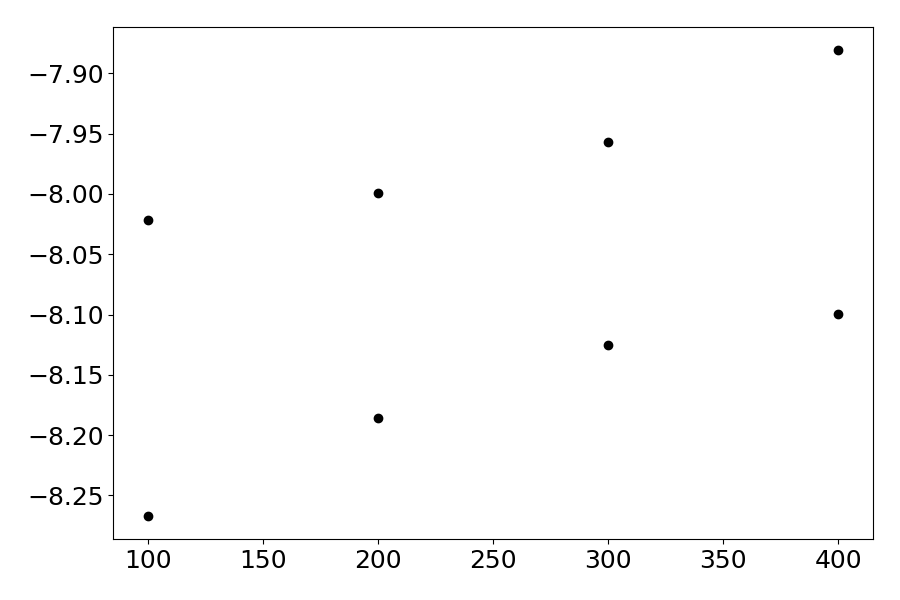

In [5]:
mode = 'abs'
# mode = 'rel'

plt.close(1)
fig,ax = plt.subplots(num=1, figsize=(9,6))

min_obs = np.infty
max_obs = -np.infty

for run in runs:
    m = np.min(list(run[f'{mode}_observables'].values()))
    M = np.max(list(run[f'{mode}_observables'].values()))
    if m < min_obs:
        min_obs = m
    if M > max_obs:
        max_obs = M
    plt.scatter([run['duration'] + 5]*2, [m, M], color='black')

fig.tight_layout()

print(f'{min_obs = }, {max_obs = }')

In [6]:
a = np.linspace(min_obs, max_obs, 101)
es = np.array([[expectation(run, f, a=_a, mode=mode) for _a in a] for run in runs])

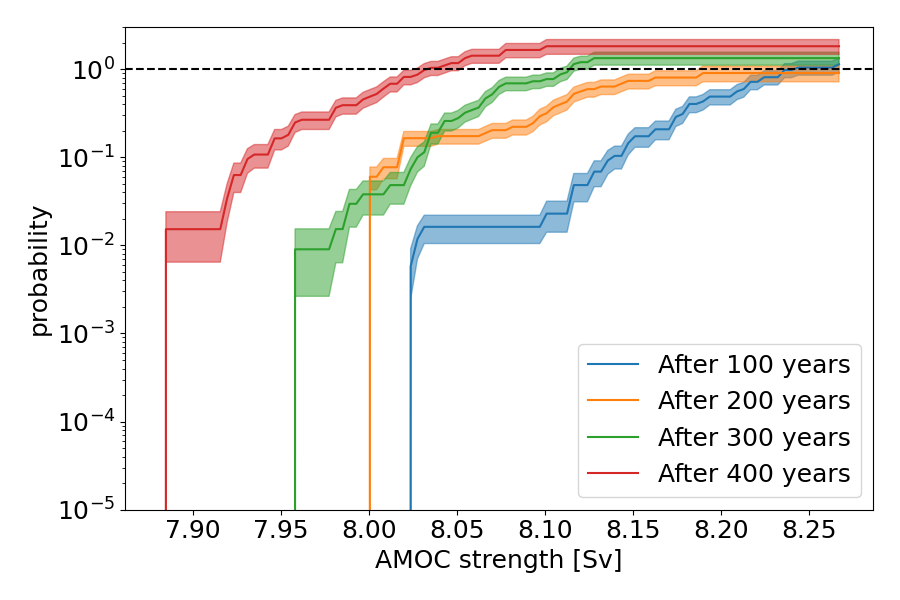

In [7]:
plt.close(11)
fig,ax = plt.subplots(num=11, figsize=(9,6))

for i,run in enumerate(runs):
    uplt.errorband(-a, es[i], label=f"After {run['duration'] + 5:.0f} years")
    
plt.yscale('log')
plt.ylim(1e-5,3)
plt.axhline(1, color='black', linestyle='dashed')

if mode == 'abs':
    plt.xlabel('AMOC strength [Sv]')
else:
    plt.xlabel('AMOC strength difference [Sv]')

plt.ylabel('probability')

plt.legend()

fig.tight_layout()

## Time-probability plot

In [8]:
iterations = np.arange(80) + 1
runs = [get_run(folder, iteration=i) for i in iterations]

DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE


min_obs = -8.389953683789058, max_obs = -7.779035461303391


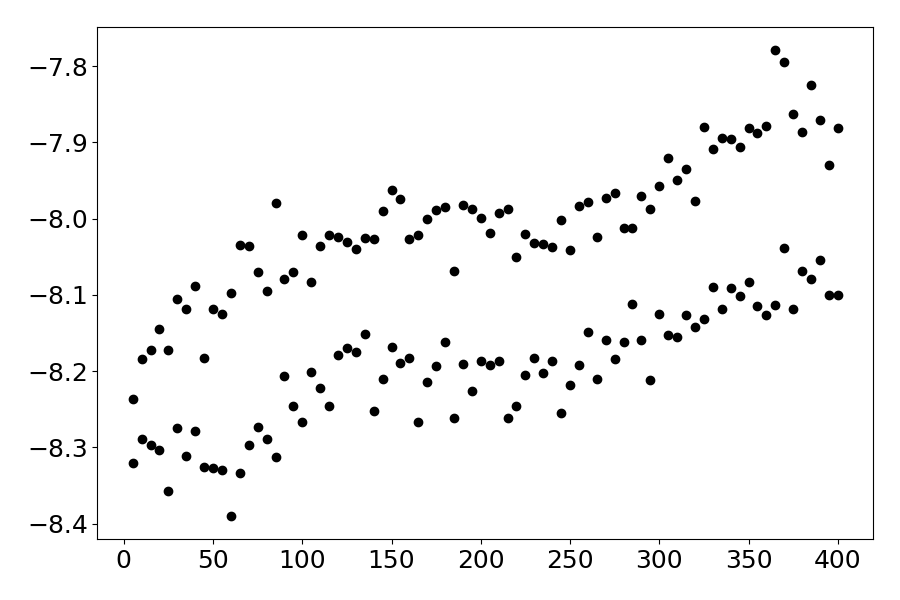

In [9]:
mode = 'abs'
# mode = 'rel'

plt.close(1)
fig,ax = plt.subplots(num=1, figsize=(9,6))

min_obs = np.infty
max_obs = -np.infty

for run in runs:
    m = np.min(list(run[f'{mode}_observables'].values()))
    M = np.max(list(run[f'{mode}_observables'].values()))
    if m < min_obs:
        min_obs = m
    if M > max_obs:
        max_obs = M
    plt.scatter([run['duration'] + 5]*2, [m, M], color='black')

fig.tight_layout()

print(f'{min_obs = }, {max_obs = }')

In [20]:
min_obs = -8.5
max_obs = -7.5

In [11]:
a = np.linspace(min_obs, max_obs, 101)

In [12]:
dur = np.array([run['duration'] + 5 for run in runs])
es = np.array([[expectation(run, f, a=_a, mode=mode) for _a in a] for run in runs])

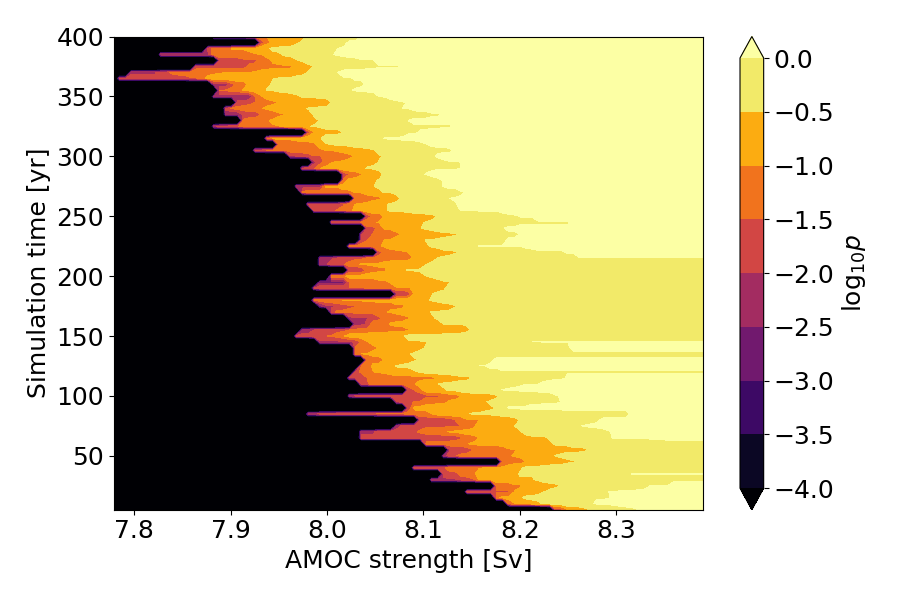

In [13]:
plt.close(2)
fig,ax = plt.subplots(num=2, figsize=(9,6))

plt.contourf(-a, dur, np.log10(uplt.nominal_value(es)+1e-7), levels=np.linspace(-4,0,9),
             # cmap='Greys_r',
             cmap='inferno',
             extend='both')

plt.colorbar(label=r'$\log_{10}p$')

if mode == 'abs':
    plt.xlabel('AMOC strength [Sv]')
else:
    plt.xlabel('AMOC strength difference [Sv]')
plt.ylabel('Simulation time [yr]')

fig.tight_layout()